# 自動着色用教師データのコピー

In [1]:
%%bash

FILE_ID=1vhanpBZ_EhsO50UjBQ7Iv8fwQIAMRPmO
CODE="t"
curl -L "https://drive.google.com/uc?export=download&confirm=${CODE}&id=${FILE_ID}" -o ffhq_128x128.zip

7z x -tzip -y ffhq_128x128.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
1 file, 151211240 bytes (145 MiB)

Extracting archive: ffhq_128x128.zip
--
Path = ffhq_128x128.zip
Type = zip
Physical Size = 151211240

Everything is Ok

Folders: 1
Files: 5018
Size:       150565341
Compressed: 151211240


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  144M  100  144M    0     0  62.6M      0  0:00:02  0:00:02 --:--:--  195M


# 乱数シードの固定

In [2]:
import random
import numpy as np
import os

np.random.seed(0)
random.seed(0)
os.environ["PYTHONHASHSEED"] = str(0)

# モジュールのインポート

In [3]:
# グラフでマルチバイト文字を使うためのライブラリのインストール
!pip install japanize_matplotlib

import os
import glob
import numpy as np
import random
import tensorflow as tf

from PIL import Image
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=4fda42cb8d35451c44d09927f1c9344757b85faeddcdc6209ff8a9b9ec6999b0
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


# 関数 save_fig：プロット結果をファイルへ保存する

In [4]:
import matplotlib.pyplot as plt
import japanize_matplotlib

import os
def save_fig(plt, file_prefix):
    if file_prefix == '':
        return

    parent = os.path.dirname(os.path.abspath(file_prefix))
    os.makedirs(parent, exist_ok=True)
    plt.savefig(f'{file_prefix}.pdf', transparent=True, bbox_inches='tight', pad_inches=0.2)
    plt.savefig(f'{file_prefix}.png', transparent=True, dpi=300, bbox_inches='tight', pad_inches=0.2)

# 実習13.1：Addレイヤーのテスト

In [5]:
import numpy as np
from tensorflow.keras.layers import Add

a=np.arange(4) # 0から3の要素を持つ要素数4の1次元配列を生成

a=a.reshape((2,2)) # 形状を2次元配列へ変形
a=a.astype('float32') # データ型をfloat32へ変更
print('a:')
print(a)

b=np.ones((2,2)) # 全ての要素が1の2次元配列を生成
print('b:')
print(b)

# aとbを(バッチサイズ、高さ、幅、チャネル数)の4次元配列へ変形
# バッチサイズは1、チャネル数は1。高さと幅は元の配列aの行数と列数
a=a.reshape((1,2,2,1))
b=b.reshape((1,2,2,1))
print('aの形状:',a.shape)
print('bの形状:',b.shape)
add=Add() # 加算レイヤーの生成
c=add([a,b]) # aとbを各バッチについて加算

print('cの形状',c.shape)
c=c.numpy() # テンソルからNumpy配列へ変換
num,ny,nx,nch=c.shape
# 見やすくするために、バッチとチャネルの次元を取り除き、2次元配列へ変換
c=c.reshape((ny,nx)) #
print('c')
print(c)

a:
[[0. 1.]
 [2. 3.]]
b:
[[1. 1.]
 [1. 1.]]
aの形状: (1, 2, 2, 1)
bの形状: (1, 2, 2, 1)
cの形状 (1, 2, 2, 1)
c
[[1. 2.]
 [3. 4.]]


# 実習13.2：Functional APIのテスト

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Activation

# ネットワークへの入力データの形状を定義
# 3次元データを想定。バッチサイズの指定は不要
inputs=Input(shape=(3, ))

# 入力データinputsを受け取る中間層。ニューロン数2
x=Dense(units=2)(inputs) # 入力総和をxとして出力

# 中間層の活性化関数
# 入力総和xを受け取り、活性化関数で変換してxとして出力
x=Activation('sigmoid')(x)

# 出力層。ニューロン数1
# 中間層からの出力xを受け取り、入力総和をxとして出力
x=Dense(units=1)(x)
# 出力層の活性化関数
# 入力総和xを受け取り、活性化関数で変換してoutputsとして出力
outputs=Activation('sigmoid')(x)


# ネットワークモデル
# 引数inputsに入力データ変数inputsを指定
# 引数outputsに出力層活性化関数からの出力outputs指定
model=Model(inputs=inputs,outputs=outputs)

# モデルの要約情報を表示
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 2)                 8         
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


# 実習13.3：教師データのファイルリスト作成

In [7]:
def load_filelist(file):
    """テキストファイルから画像ファイルパスを読み込む。
    Args:
        file (str): テキストファイルのパス
    Returns:
        ret (list): 画像ファイルパスを格納したリスト
    """
    ret=[] # 画像ファイルパスを格納するリスト
    with open(file, 'r') as f: # ファイルを読み取り専用(r)で開き、変数fで扱う
        lines=f.readlines() # 全行をファイルから読み込む
        for l in lines: # 各行について
            l = l.rstrip() # 末尾の改行を取り除く
            ret.append(l)  # リストに画像ファイルパスを追加
    return ret

# 関数の外
train_list=load_filelist('train.txt') # 訓練画像ファイルパスを読み込む
test_list=load_filelist('test.txt')   # テスト画像ファイルパスを読み込む

print('訓練データ数 =',len(train_list))
print('テストデータ数 =',len(test_list))

訓練データ数 = 5000
テストデータ数 = 16


# 実習13.4：画像サイズを取得する

In [8]:
from PIL import Image

# 訓練データの最初のファイルを画像として読み込む
image=Image.open(train_list[0])
nx=image.width # 画像の幅
ny=image.height # 画像の高さ

print('画像の幅：',nx)
print('画像の高さ：',ny)

画像の幅： 128
画像の高さ： 128


# 実習13.5：自動着色用ネットワークモデルの定義

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization,MaxPooling2D
from tensorflow.keras.layers import Add, Activation, Conv2DTranspose, UpSampling2D, ReLU

def ConvBnReLU(input,filters):
    """畳み込み、バッチ正規化、活性化関数からなるブロックを生成する。
    Args:
        image (tensor): 入力テンソル
        filters (int):畳み込み層のフィルタ数
    Returns:
        x (tensor):ブロックからの出力
    """
    x=input
    for i in range(2):
        # padding='same': 出力特徴量マップの高さと幅を入力特徴量マップと同じにするモード
        x=Conv2D(filters,kernel_size=(3,3),padding='same')(x)
        x=BatchNormalization()(x) # バッチ正規化
        x=Activation('relu')(x) # 活性化関数 ReLU
    return x

# 入力層の形状(縦方向画素数、横方向画素数、チャネル数)
# グレースケール画像を入力とするのでチャネル数は1
inputs = Input(shape=(ny,nx,1))

# エンコーダ
block1=ConvBnReLU(inputs,64) # 第1ブロック
x=MaxPooling2D(pool_size=(2,2))(block1) # マックスプーリング層1
block2=ConvBnReLU(x,128) # 第2ブロック
x=MaxPooling2D(pool_size=(2,2))(block2) # マックスプーリング層2
block3=ConvBnReLU(x,256) # 第3ブロック
x=MaxPooling2D(pool_size=(2,2))(block3) # マックスプーリング層3
block4=ConvBnReLU(x,512) # 第4ブロック
x=MaxPooling2D(pool_size=(2,2))(block4) # マックスプーリング層4
x=ConvBnReLU(x,1024) # 第5ブロック
# デコーダ
x=Conv2DTranspose(filters=512,kernel_size=(2,2),strides=2)(x) # 転置畳み込み層1
x=Add()([block4,x]) # ブロック4と転置畳み込み層1 からの出力を接続
x=ConvBnReLU(x,512) # 第6ブロック
x=Conv2DTranspose(filters=256,kernel_size=(2,2),strides=2)(x) # 転置畳み込み層2
x=Add()([block3,x]) # ブロック3と転置畳み込み層2 からの出力を接続
x=ConvBnReLU(x,256) # 第7ブロック
x=Conv2DTranspose(filters=128,kernel_size=(2,2),strides=2)(x) # 転置畳み込み層3
x=Add()([block2,x]) # ブロック2と転置畳み込み層3 からの出力を接続
x=ConvBnReLU(x,128) # 第8ブロック
x=Conv2DTranspose(filters=64,kernel_size=(2,2),strides=2)(x) # 転置畳み込み層4
x=Add()([block1,x]) # ブロック1と転置畳み込み層4 からの出力を接続
x=ConvBnReLU(x,64) # 第9ブロック

# 出力層
# 1x1畳み込みを用いて、64チャネル特徴量マップを3チャネル特徴量マップにする
# 特徴量マップの高さと幅は維持する
x=Conv2D(filters=3,kernel_size=(1,1))(x)
outputs=Activation('sigmoid')(x) # 活性化関数にsigmoidを指定

# モデル生成
model=Model(inputs=inputs, outputs=outputs)

# オプティマイザと損失関数の指定
model.compile(optimizer='RMSprop',loss='mse')

# モデルの要約を表示
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 64  640         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 128, 128, 64  256        ['conv2d[0][0]']                 
 alization)                     )                                                           

# おまけ：ネットワーク構造を可視化する

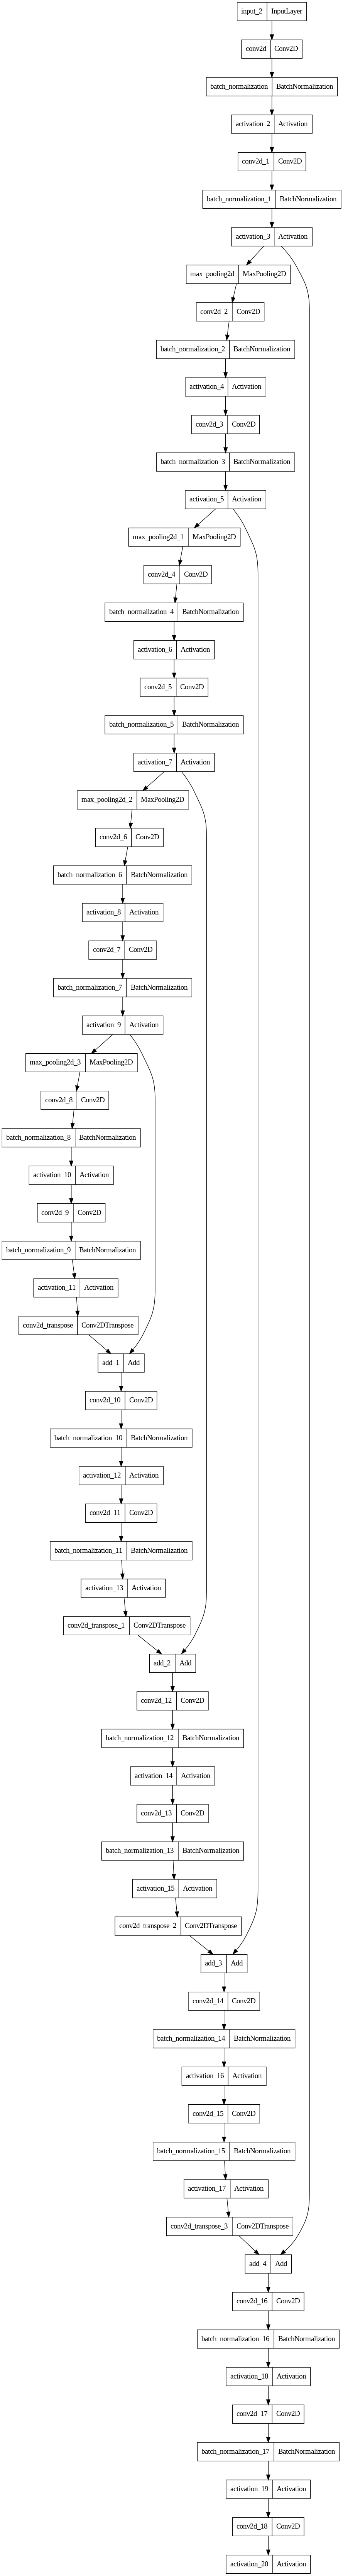

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model)

# ImageDataset：データセットクラス

In [11]:
import tensorflow
import PIL.Image

class ImageDataset(tensorflow.keras.utils.Sequence):
    """自動着色用画像データセットクラス。
    Attributes:
        file_list (str): 画像ファイルパスを格納したリスト
        img_size (tuple): 画像の高さと幅を格納したタプル
        batch_size (int): バッチサイズ
        shuffle (boolean): エポックごとにファイルの並びをシャッフルするかどうか
    """

    def __init__(self, file_list, img_size, batch_size, shuffle=False):
        """初期化メソッド。
        Args:
            file_list: 画像ファイルパスを格納したリスト
            img_size (tuple): 画像の高さと幅を格納したタプル
            batch_size (int): バッチサイズ
            shuffle (boolean): エポックごとにファイルの並びをシャッフルするかどうか
        """
        self.file_list = file_list
        self.img_size = img_size
        self.batch_size = batch_size
        self.shuffle = shuffle

    def __len__(self):
        """ステップ数を取得する。

        Returns:
            n (int): ステップ数
        """
        return len(self.file_list) // self.batch_size

    def __getitem__(self, index):
        """指定バッチ番号のデータを取得する。
        Args:
            index (int): バッチ番号
        Returns:
            (tuple): グレースケール画像とその元になったカラー画像のタプル
        """
        tmp = self.file_list[index * self.batch_size:(index+1) * self.batch_size]

        x = [] # ネットワークへの入力グレースケール画像を格納するリスト
        y = [] # 正解カラー画像を格納するリスト
        for t in tmp:
            img = PIL.Image.open(t)
            img = img.convert('RGB')

            gray = img.convert('L')
            img = np.asarray(img)
            gray = np.asarray(gray)
            if random.random() < 0.5:
                img = img[:,::-1, :]
                gray = gray[:, ::-1]

            img = img / 255.0
            gray = gray / 255.0
            x.append(gray.reshape(1, *gray.shape, 1))
            y.append(img.reshape(1, *img.shape))

        return np.concatenate(x, axis=0), np.concatenate(y, axis=0)

    def on_epoch_end(self):
        """shuffle属性がTrueの場合、各エポック終了時にファイルの並びをシャッフルする
        """
        if self.shuffle:
            random.shuffle(self.file_list)

# 実習13.6：データセットの生成

In [12]:
batch_size=16 #

# 訓練データセット
train_dataset=ImageDataset(train_list, # 訓練画像ファイルパスを格納したリスト
                           img_size=(ny,nx), # 画像の高さと幅のタプル
                           batch_size=batch_size, # バッチサイズ
                           shuffle=True) # エポックごとにファイルパスをシャッフルする
# テストデータセット
test_dataset=ImageDataset(test_list, # テスト画像ファイルパスを格納したリスト
                          img_size=(ny,nx), # 画像の高さと幅のタプル
                          batch_size=batch_size, # バッチサイズ
                          shuffle=False) # エポックごとにファイルパスをシャッフルしない

print('訓練データセットのステップ数:',len(train_dataset))
print('テストデータセットのステップ数:',len(test_dataset))

x,y=train_dataset[0]
print('訓練データセットの入力データの形状:',x.shape)
print('訓練データセットの正解データの形状:',y.shape)

訓練データセットのステップ数: 312
テストデータセットのステップ数: 1
訓練データセットの入力データの形状: (16, 128, 128, 1)
訓練データセットの正解データの形状: (16, 128, 128, 3)


# 実習13.7：テスト用データセットの画像を表示する

入力データの形状: (16, 128, 128, 1)
正解データの形状: (16, 128, 128, 3)


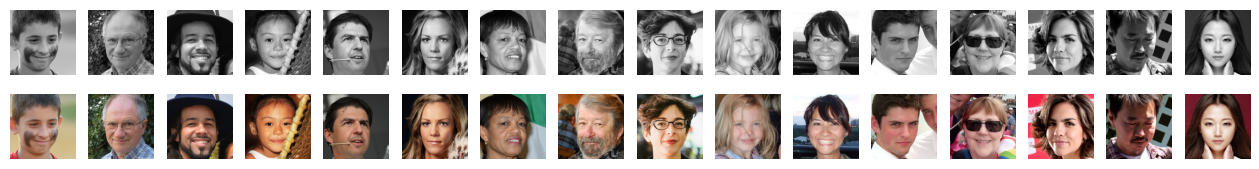

In [13]:
# テストデータから1バッチ分のデータを取り出す
x_test,y_test=test_dataset[0]

print('入力データの形状:',x_test.shape)
print('正解データの形状:',y_test.shape)

N=len(x_test)

plt.figure(figsize=(16,2))
for i in range(N):
    # 1行目に入力グレースケール画像を表示
    plt.subplot(2,N,i+1)
    # 形状(ny, nx, 1)からチャネル成分の次元を削除して形状を(ny, nx)とする。
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off') # 軸非表示

    # 2行目の同じ列に正解画像を表示
    plt.subplot(2,N,i+1+N)
    plt.imshow(y_test[i])
    plt.axis('off') # 軸非表示

plt.show()

# 自動着色用コールバック

In [14]:
import shutil
import os
from tensorflow.keras.callbacks import Callback

S_NC = 4 # 着色サンプル保存時の列数
S_NR = 4 # 着色サンプル保存時の行数
N_TEST = S_NC * S_NR # サンプル数

class ColorlingCallback(Callback):
    """各エポック終了時にグレースケール画像から着色画像を推定し、結果を画像として保存するクラス。
    Attributes:
        model (tf.model.Model): 自動着色ネットワークモデル
        x_test (tensor): グレースケール画像
        y_test (tensor): カラー画像
        output_dir (str): 結果保存先ディレクトリ
    """

    def __init__(self, model, x_test, y_test, output_dir):
        """初期化メソッド。
        グレースケール画像の保存も行う。出力ディレクトリが存在しない場合はディレクトリを作成する。
        Args:
            model (tf.model.Model): 自動着色ネットワークモデル
            x_test (tensor): グレースケール画像
            y_test (tensor): カラー画像
            output_dir (str): 結果保存先ディレクトリ
        """
        self.model = model
        self.output_dir = output_dir
        os.makedirs(output_dir, exist_ok=True)

        self.color_samples = y_test
        self.gray_samples = x_test

        with Image.fromarray(self.combine_images(self.gray_samples)) as img:
            img.save(f'{self.output_dir}/gray.png')

    def combine_images(self, images):
        """タイル上に並べた画像を取得する。
        Args:
            images (tensor): 複数枚の画像

        Returns:
            combined (ndarray): タイル上に並べた画像
        """
        ny, nx, nc = images.shape[1:]
        if nc == 3: # カラー画像の場合
            combined = np.zeros((ny*S_NR, nx*S_NC, nc), dtype=np.float32)

            for i in range(images.shape[0]):
                col_i = i % S_NC
                row_i = i // S_NR
                combined[row_i*ny:(row_i+1)*ny, col_i*nx:(col_i+1)*nx, :] = images[i,:,:,:]
            combined = (combined*255.0).astype(np.uint8)
        else: # グレースケール画像の場合
            combined = np.zeros((ny*S_NR, nx*S_NC), dtype=np.float32)
            images = images.squeeze()
            for i in range(images.shape[0]):
                col_i = i % S_NC
                row_i = i // S_NR
                combined[row_i*ny:(row_i+1)*ny, col_i*nx:(col_i+1)*nx] = images[i,:,:]
            combined = (combined*255.0).astype(np.uint8)

        return combined

    def on_train_begin(self, logs):
        """訓練開始時にカラー画像を保存する。
        tf.keras.callbacks.Callbackのメソッドをオーバーライド。
        Args:
            logs (dict): 未使用
        """
        combined = self.combine_images(self.color_samples[:N_TEST])
        with Image.fromarray(combined) as img:
            img.save(f"{self.output_dir}/true.png")

    def on_epoch_end(self, epoch, logs):
        """各エポック終了時にグレースケール画像からカラー画像を推定し、ファイルへ保存する。
        tf.keras.callbacks.Callbackのメソッドをオーバーライド。
        Args:
            epoch (int): エポック番号
            logs (dict): 未使用
        """
        preds = self.model.predict(self.gray_samples, verbose=0)[:N_TEST]
        combined = self.combine_images(preds)
        with Image.fromarray(combined) as img:
            img.save(f"{self.output_dir}/coloring_epoch_{epoch+1:03}.png")

# 実習13.8：学習

In [15]:
# エポックごとに予測画像を保存するコールバック
# 画像はresultsフォルダに保存される
cc=ColorlingCallback(model, x_test, y_test, 'results')

epochs=40 # エポック数

# 学習
history=model.fit(train_dataset,   # 訓練データセット
                  epochs=epochs,   # エポック数
                  validation_data=test_dataset,   # テストデータセット
                  callbacks=[cc])  #エポックごとに実行するコールバック

Epoch 1/40
  6/312 [..............................] - ETA: 1:00 - loss: 0.0455

312/312 [==============================] - 95s 204ms/step - loss: 0.0083 - val_loss: 0.0406
Epoch 2/40
312/312 [==============================] - 63s 201ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 3/40
312/312 [==============================] - 64s 205ms/step - loss: 0.0063 - val_loss: 0.0040
Epoch 4/40
312/312 [==============================] - 65s 207ms/step - loss: 0.0061 - val_loss: 0.0039
Epoch 5/40
312/312 [==============================] - 64s 206ms/step - loss: 0.0060 - val_loss: 0.0040
Epoch 6/40
312/312 [==============================] - 65s 208ms/step - loss: 0.0058 - val_loss: 0.0037
Epoch 7/40
312/312 [==============================] - 65s 209ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 8/40
312/312 [==============================] - 65s 209ms/step - loss: 0.0057 - val_loss: 0.0042
Epoch 9/40
312/312 [==============================] - 65s 208ms/step - loss: 0.0057 - val_loss: 0.0038
Epoch 10/40
312/312 [==============================] - 65s 206ms/step - loss: 0.0056

# 実習13.9：損失の推移を可視化

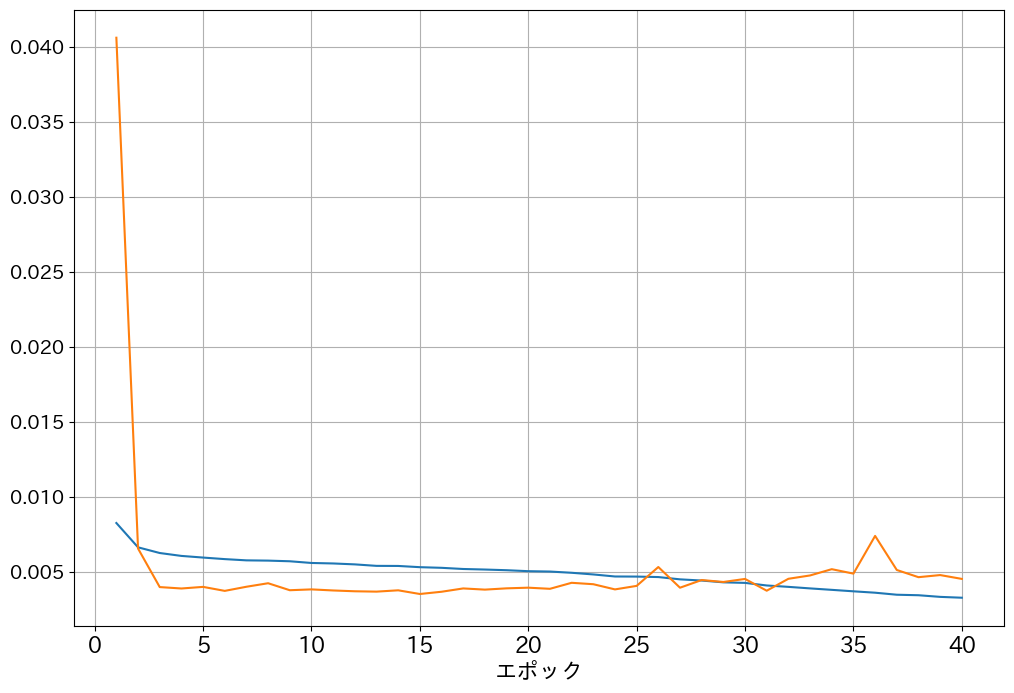

In [16]:
train_loss=history.history['loss'] # 履歴から訓練データについての損失を取り出す
val_loss=history.history['val_loss'] # 履歴からテストデータについての損失を取り出す

# 横軸。1～エポック数まで1刻みの値を持つ配列を生成
xs=np.arange(1,1+epochs)
plt.figure(figsize=(12,8))
plt.plot(xs,train_loss,label='訓練データ')
plt.plot(xs,val_loss,label='テストデータ')
plt.xlabel('エポック',fontsize=16) # X軸ラベルとフォントサイズ
plt.xticks(fontsize=14) # X軸目盛りとフォントサイズ
plt.yticks(fontsize=14) # Y軸目盛りとフォントサイズ
plt.xticks(fontsize=16) # 凡例表示とそのフォントサイズ
plt.grid() # 格子の表示
plt.show() # グラフ

# 実習13.10：最終結果を表示する

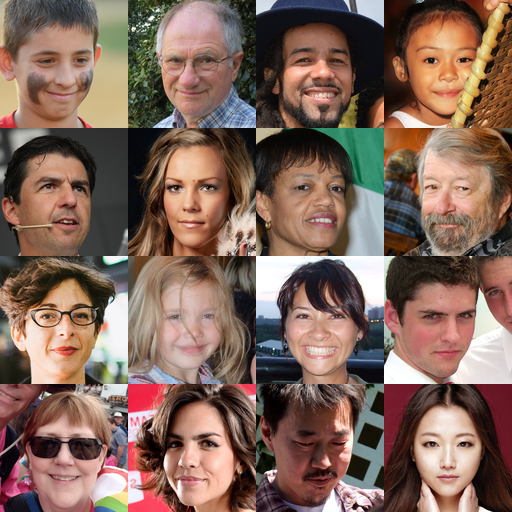

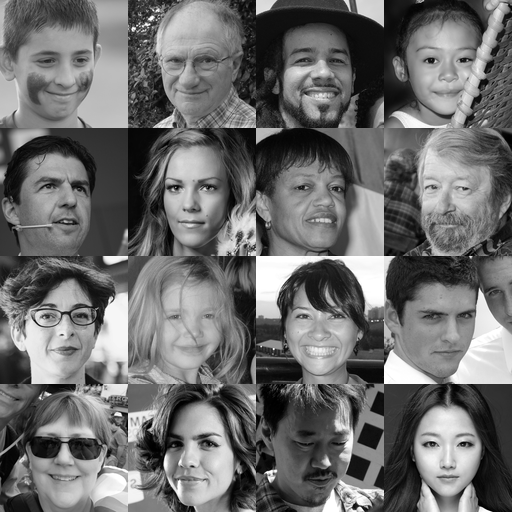

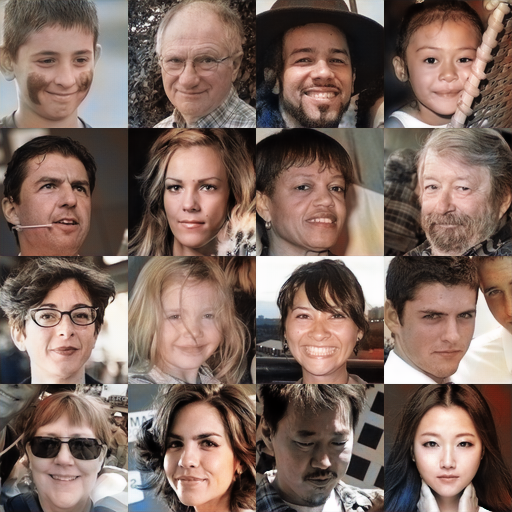

In [17]:
from IPython.display import display
import IPython.display

# テスト画像から作った正解画像を読み込んで表示する
display(IPython.display.Image('./results/true.png'))

# テスト画像をグレースケール化した画像を表示する
display(IPython.display.Image('./results/gray.png'))

# # 学習したネットワークが着色した結果を表示する
display(IPython.display.Image(f'./results/coloring_epoch_{epochs:03d}.png'))

# おまけ：正解画像との差を可視化する

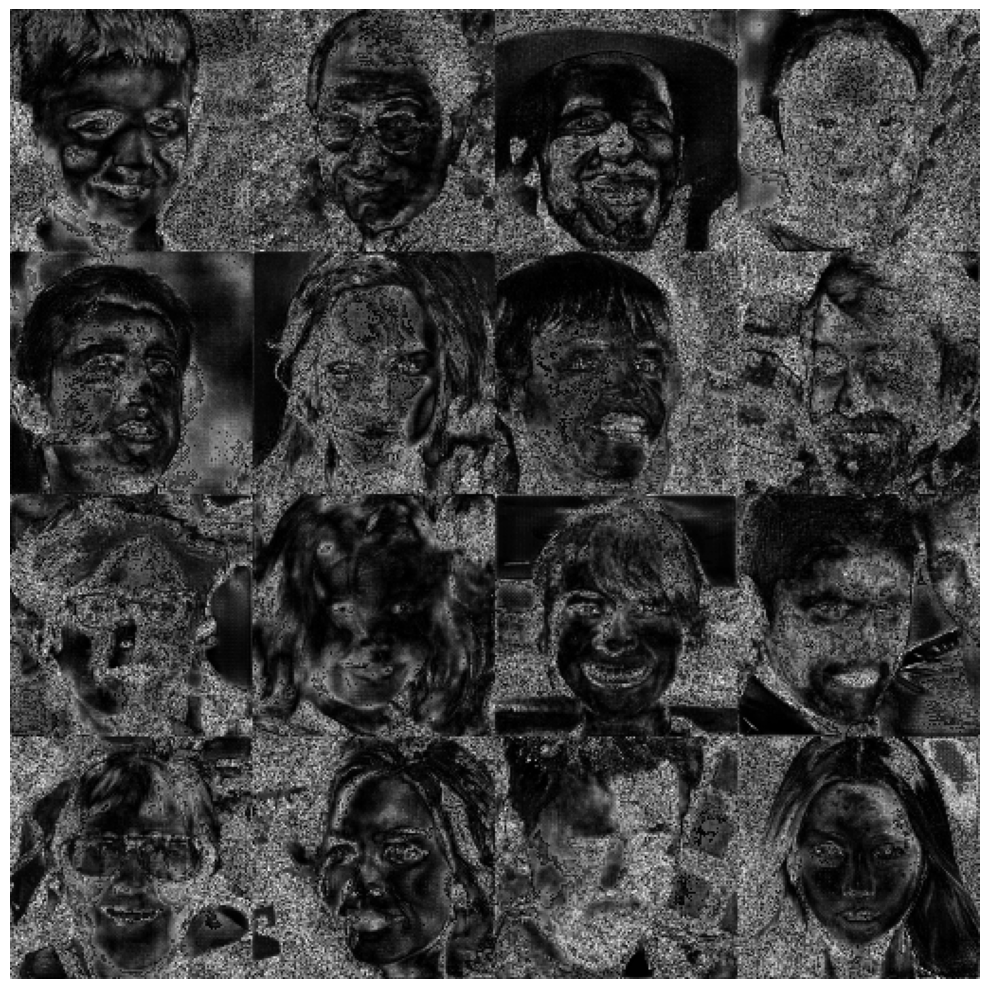

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 正解画像を配列にする.
true_image = Image.open('results/true.png')
true_image = np.array(true_image)

# 着色画像を配列にする
coloring_image = Image.open(f'results/coloring_epoch_{epochs:03d}.png')
coloring_image = np.array(coloring_image)

# 正解に対する着色結果の平均二乗誤差を計算
mse = (coloring_image - true_image) ** 2
mse = np.sum(mse, axis=2) / true_image.size

# [0, 1]に正規化
mse_img = mse / np.max(mse)

# 画像を表示
plt.figure(figsize=(10, 10))
plt.imshow(mse_img, cmap='gray')
plt.axis('off')
plt.tight_layout()
save_fig(plt, 'mse_coloring-true')
plt.show()